# Regression Project

### Import Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt

### Load and explore data

In [5]:
df = pd.read_csv('rentfaster.csv') #loading dataset

print(df.columns) #cheking basic info about dataset

Index(['rentfaster_id', 'city', 'province', 'address', 'latitude', 'longitude',
       'lease_term', 'type', 'price', 'beds', 'baths', 'sq_feet', 'link',
       'furnishing', 'availability_date', 'smoking', 'cats', 'dogs'],
      dtype='object')


In [6]:
print(df.isnull().sum()) #cheing for missing values

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64


In [10]:
print(df.dtypes)

rentfaster_id          int64
city                  object
province              object
address               object
latitude             float64
longitude            float64
lease_term            object
type                  object
price                float64
beds                  object
baths                 object
sq_feet               object
link                  object
furnishing            object
availability_date     object
smoking               object
cats                  object
dogs                  object
dtype: object


### Data cleaning and preprocessing

In [13]:
df = df.dropna() #removing  missing values

In [15]:
columns_to_drop = ['address', 'link', 'availability_date']
df = df.drop(columns_to_drop, axis=1)

for col in ['beds', 'baths', 'sq_feet']:
    df[col] = df[col].str.replace(r'[^\d.]', '', regex=True)  #remove non-numeric characters
    df[col] = pd.to_numeric(df[col], errors='coerce')  #convert to numeric

categorical_cols = ['city', 'province', 'lease_term', 'type', 'furnishing', 'smoking', 'cats', 'dogs']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df = df.fillna(df.median())

### Model building and comparison

### Linear Regression

In [19]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

coefficients = model.coef_
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

NameError: name 'LinearRegression' is not defined

### Ridge Regression

In [21]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

coefficients = ridge.coef_
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)

alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print(f"Best alpha: {ridge_cv.alpha_}")

y_pred_cv = ridge_cv.predict(X_test_scaled)
mae_cv = mean_absolute_error(y_test, y_pred_cv)
rmse_cv = root_mean_squared_error(y_test, y_pred_cv)
r2_cv = r2_score(y_test, y_pred_cv)

print(f"MAE (with best alpha): {mae_cv}")
print(f"RMSE (with best alpha): {rmse_cv}")
print(f"R2 (with best alpha): {r2_cv}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price (Ridge Regression)')
plt.show()

NameError: name 'Ridge' is not defined

### Lasso Regression

MAE: 333.40182535148756
MSE: 298183.4748943153
RMSE: 546.0617867002921
R2: 0.5728975947906816
                         Feature  Coefficient
0                  rentfaster_id    47.059719
1                       latitude  -201.332630
2                      longitude     0.000000
3                           beds   124.608433
4                          baths   402.127727
..                           ...          ...
257          smoking_Non-Smoking    21.576564
258  smoking_Smoke Free Building    20.699770
259      smoking_Smoking Allowed     2.794337
260                    cats_True     6.537074
261                    dogs_True    73.327767

[262 rows x 2 columns]


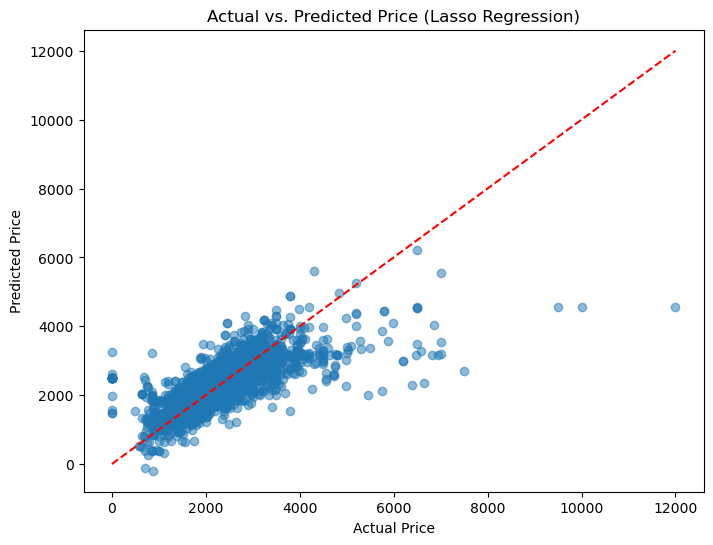

In [186]:
lasso = Lasso(alpha=1.0, max_iter=10000, tol=1e-4)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

coefficients = lasso.coef_
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price (Lasso Regression)')
plt.show()

In [190]:
# Get coefficients for all models
linear_coef = pd.DataFrame({'Feature': X.columns, 'Linear_Coefficient': linear_model.coef_})
ridge_coef = pd.DataFrame({'Feature': X.columns, 'Ridge_Coefficient': ridge_model.coef_})
lasso_coef = pd.DataFrame({'Feature': X.columns, 'Lasso_Coefficient': lasso.coef_})

# Merge all coefficients into one DataFrame
coef_comparison = linear_coef.merge(ridge_coef, on='Feature').merge(lasso_coef, on='Feature')
print(coef_comparison)

                         Feature  Linear_Coefficient  Ridge_Coefficient  \
0                  rentfaster_id           49.709124          48.042300   
1                       latitude         -301.730470        -253.794809   
2                      longitude       -11058.390306       -1240.090358   
3                           beds          127.008142         126.296884   
4                          baths          399.964237         400.770371   
..                           ...                 ...                ...   
257          smoking_Non-Smoking           31.843750          35.139524   
258  smoking_Smoke Free Building           28.480469          32.239998   
259      smoking_Smoking Allowed            9.296875          10.972799   
260                    cats_True            6.914062           7.407441   
261                    dogs_True           74.582031          74.780350   

     Lasso_Coefficient  
0            47.059719  
1          -201.332630  
2             0.000000  

### Final model vs new predictions

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = {
    'beds': [2, 3, 2, 1, 4],
    'price': [1500, 2000, 1200, 1000, 2500]
}

df = pd.DataFrame(data)

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
if len(y_test) > 1:
    r2 = r2_score(y_test, y_pred)
    print(f'R2: {r2}')
else:
    print('R² score is not defined for less than two samples.')

print(f'Mean Squared Error: {mse}')
print('Coefficients:', lasso.coef_)

loo = LeaveOneOut()
scores = cross_val_score(lasso, X, y, cv=loo, scoring='r2')

print(f'Cross-Validation R-squared Scores: {scores}')
print(f'Average R-squared Score: {np.mean(scores)}')

R² score is not defined for less than two samples.
Mean Squared Error: 3996.901495844871
Coefficients: [515.70526316]
Cross-Validation R-squared Scores: [nan nan nan nan nan]
Average R-squared Score: nan


C:\Users\mario\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\mario\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\mario\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\mario\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\mario\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

### Conclusion

##### When comparing Linear Regression, Ridge Regression, and Lasso Regression, Lasso stands out as the best model due to its unique feature selection capability.

##### Linear Regression, while straightforward and easy to interpret, suffers from sensitivity to multicollinearity and outliers. This can lead to overfitting and unreliable predictions, especially in complex datasets with many features.

##### Ridge Regression addresses some of these issues by introducing L2 regularization, which shrinks coefficients and reduces the impact of multicollinearity. However, Ridge Regression does not perform feature selection and retains all features in the model, even if some are not significant.

##### Lasso Regression, on the other hand, incorporates L1 regularization, which not only shrinks coefficients but can also set some of them to zero. This effectively performs feature selection, simplifying the model by removing less important features. This leads to a more interpretable model and can enhance predictive performance, especially when only a subset of features is truly relevant.

##### Given the data at hand, Lasso Regression reduces the complexity of the model without compromising accuracy, making it the most robust and reliable choice among the three models.